In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

# Training the model

In [2]:
# Importing the dataset
dataset_1 = pd.read_csv("C:\\Users\\Nayeem\Desktop\\Project_Data\\Segmented_Data\\500 ms window_overlap\\Hand\\p1_hand_train.csv")

In [3]:
dataset_1.rename(columns={'#->Timestamp':'Timestamp'}, inplace=True)

In [4]:
dataset_1.head()

,Timestamp,label,TYPE_ACCELEROMETER-Xmean,TYPE_ACCELEROMETER-Ymean,TYPE_ACCELEROMETER-Zmean,TYPE_GYROSCOPE-Xmean,TYPE_GYROSCOPE-Ymean,TYPE_GYROSCOPE-Zmean,TYPE_ACCELEROMETER-Xvar,TYPE_ACCELEROMETER-Yvar,...,TYPE_ACCELEROMETER-Zmin,TYPE_GYROSCOPE-Xmin,TYPE_GYROSCOPE-Ymin,TYPE_GYROSCOPE-Zmin,TYPE_ACCELEROMETER-Xmax,TYPE_ACCELEROMETER-Ymax,TYPE_ACCELEROMETER-Zmax,TYPE_GYROSCOPE-Xmax,TYPE_GYROSCOPE-Ymax,TYPE_GYROSCOPE-Zmax
0,0.961,Stand,0.237214,2.865086,9.671417,-0.228201,0.147550,-0.330693,0.202537,0.645467,...,7.546509,-0.542191,-0.568848,-1.527573,1.371872,4.261673,10.860092,0.073517,0.648727,0.556061
1,1.467,Stand,2.234932,2.064370,9.233183,-0.123509,0.054976,-0.080931,0.181615,0.178846,...,8.403641,-0.289734,-0.066040,-0.223694,2.975983,2.806000,9.940720,0.096939,0.151245,0.050064
2,1.965,Stand,2.142132,2.097600,9.286143,0.032225,0.003233,0.009014,0.008243,0.049247,...,8.805862,-0.104370,-0.057526,-0.044724,2.343918,2.614456,9.777908,0.148071,0.061768,0.068176
3,2.464,Stand,2.599521,2.371689,9.137225,0.001868,-0.022762,0.150734,0.034221,0.022032,...,8.892059,-0.146988,-0.249268,-0.034073,2.832336,2.643188,9.461884,0.155533,0.118225,0.262054
4,2.962,Stand,2.158988,1.993501,9.287293,-0.033798,0.126007,-0.059409,0.029548,0.027097,...,8.973465,-0.202377,-0.004257,-0.106522,2.573761,2.351105,9.739609,0.094818,0.319565,-0.012772


In [5]:
from sklearn.model_selection import train_test_split
X_train = dataset_1.drop("label", axis = 1)
y_train = dataset_1["label"]

In [6]:
X_train.shape, y_train.shape

((262, 31), (262,))

In [7]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_1 = StandardScaler()
# X_train = sc_1.fit_transform(X_train)

In [8]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 1, random_state = None)
# model.fit(X_train, y_train)

In [9]:
cross_val_train = cross_val_score(model, X_train, y_train, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [10]:
cross_val_train = np.mean(cross_val_train)

In [11]:
cross_val_train

0.6676638176638178

In [12]:
# model.score(X_train, y_train)

# Testing the model

In [13]:
dataset_2 = pd.read_csv("C:\\Users\\Nayeem\Desktop\\Project_Data\\Segmented_Data\\500 ms window_overlap\\Hand\\p1_hand_test.csv")

In [14]:
dataset_2.rename(columns={'#->Timestamp':'Timestamp'}, inplace=True)

In [15]:
dataset_2.head()

,Timestamp,label,TYPE_GYROSCOPE-Xmean,TYPE_GYROSCOPE-Ymean,TYPE_GYROSCOPE-Zmean,TYPE_ACCELEROMETER-Xmean,TYPE_ACCELEROMETER-Ymean,TYPE_ACCELEROMETER-Zmean,TYPE_GYROSCOPE-Xvar,TYPE_GYROSCOPE-Yvar,...,TYPE_GYROSCOPE-Zmin,TYPE_ACCELEROMETER-Xmin,TYPE_ACCELEROMETER-Ymin,TYPE_ACCELEROMETER-Zmin,TYPE_GYROSCOPE-Xmax,TYPE_GYROSCOPE-Ymax,TYPE_GYROSCOPE-Zmax,TYPE_ACCELEROMETER-Xmax,TYPE_ACCELEROMETER-Ymax,TYPE_ACCELEROMETER-Zmax
0,0.416,Stand,-0.121738,-0.199040,0.103969,-0.173145,3.632474,9.057736,0.001709,0.092409,...,-0.022354,-1.604111,3.315964,8.724457,-0.019150,0.037262,0.468719,0.828384,4.129990,9.835373
1,0.915,Stand,-0.231868,0.534832,-0.014056,-0.332697,3.124904,9.043946,0.034150,0.031247,...,-0.124619,-2.164352,2.487564,8.604752,0.099075,0.711578,0.159790,0.526718,3.641571,9.366104
2,1.413,Stand,0.223138,0.185235,-0.316159,-1.476162,1.832993,9.609552,0.014861,0.013216,...,-0.450592,-1.757340,1.400604,9.327805,0.395218,0.391998,-0.204514,-1.173157,2.157166,10.342941
3,1.911,Stand,-0.206190,-0.112070,0.150669,-1.020118,3.166468,8.939463,0.013086,0.021166,...,-0.087341,-2.279266,2.679108,8.025360,-0.055374,0.074554,0.255661,0.737411,3.751709,9.653412
4,2.408,Stand,0.100955,-0.095262,0.174662,-1.103816,2.814041,9.530065,0.036099,0.071936,...,-0.121429,-1.723816,2.152374,8.240829,0.415466,0.381348,0.583755,-0.368698,4.067734,10.802628


In [16]:
from sklearn.model_selection import train_test_split
X_test = dataset_2.drop("label", axis = 1)
y_test = dataset_2["label"]

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_2 = StandardScaler()
X_test = sc_2.fit_transform(X_test)

In [18]:
ts = dataset_2["Timestamp"]

In [19]:
cross_val_test = cross_val_score(model, X_test, y_test, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [20]:
cross_val_test = np.mean(cross_val_test)

In [21]:
cross_val_test

0.7114285714285714

In [22]:
# model.score(X_test, y_test)

## Getting accuracy, precision, recall and f1-score with our best model

In [23]:
model_accuracy = cross_val_score(model, X_test, y_test, cv=10, scoring = "accuracy")
model_accuracy = np.mean(model_accuracy)
model_accuracy

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7114285714285714

In [24]:
model_precision = cross_val_score(model, X_test, y_test, cv=10, scoring = "precision_micro")
model_precision = np.mean(model_precision)
model_precision

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7114285714285714

In [25]:
model_recall = cross_val_score(model, X_test, y_test, cv=10, scoring = "recall_micro")
model_recall = np.mean(model_recall)
model_recall

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7114285714285714

In [26]:
model_f1 = cross_val_score(model, X_test, y_test, cv=10, scoring = "f1_micro")
model_f1 = np.mean(model_f1)
model_f1

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7114285714285715

## Visualizing

Accuracy of the model is: 71.14%
Precision of the model is: 0.71
Recall of the model is: 0.71
F1-score of the model is: 0.71


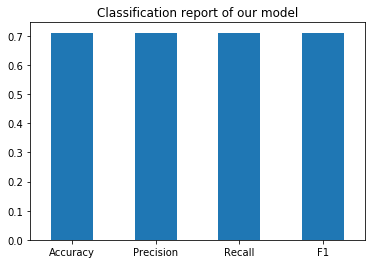

In [27]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": model_accuracy,
                          "Precision": model_precision,
                          "Recall": model_recall,
                          "F1": model_f1}, index=[0])
cv_metrics.T.plot.bar(title="Classification report of our model",legend=False)
plt.xticks(rotation=0);
print(f"Accuracy of the model is: {model_accuracy *100:.2f}%")
print(f"Precision of the model is: {model_precision:.2f}")
print(f"Recall of the model is: {model_recall:.2f}")
print(f"F1-score of the model is: {model_f1:.2f}")

In [28]:
y_predict = cross_val_predict(model, X_test, y_test, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [29]:
y_predict;

## Confusion matrics

In [30]:
cm = confusion_matrix(y_test, y_predict)

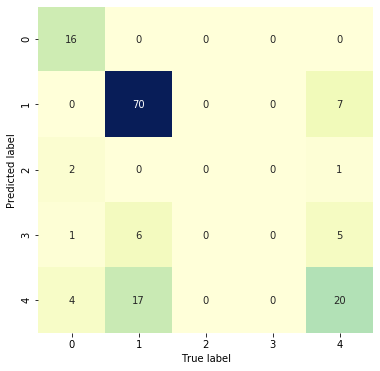

In [31]:
def plot_conf_mat(cm):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(cm, annot=True,cbar=False, cmap="YlGnBu", fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(cm)

In [32]:
df = pd.DataFrame({"Timestamp": ts,
                   "Predicted_value": y_predict,
                   })

In [33]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,Timestamp,Predicted_value
0,0.416,Stand
1,0.915,Stand
2,1.413,Stand
3,1.911,Stand
4,2.408,Stand
5,2.908,Stand
6,3.406,Stand
7,3.904,Stand
8,4.401,Stand
9,4.900,Stand


In [34]:
df.to_csv("SVM_P1_hand.csv", index = False)